# PyTorch software benchmark analysis

Single node throughput comparisons between installation versions

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
ls /global/cscratch1/sd/sfarrell/pytorch-benchmarks/results

gpu-ngc_20.03_v0-nccl-n1/  gpu-v1.5.0-gloo-n2/   gpu-v1.5.0-nccl-n2/
gpu-v1.1.0-nccl-n1/        gpu-v1.5.0-gloo-n32/  gpu-v1.5.0-nccl-n32/
gpu-v1.2.0-nccl-n1/        gpu-v1.5.0-gloo-n4/   gpu-v1.5.0-nccl-n4/
gpu-v1.3.1-nccl-n1/        gpu-v1.5.0-gloo-n64/  gpu-v1.5.0-nccl-n64/
gpu-v1.4.0-nccl-n1/        gpu-v1.5.0-gloo-n8/   gpu-v1.5.0-nccl-n8/
gpu-v1.5.0-gloo-n1/        gpu-v1.5.0-nccl-n1/   hsw-v1.5.0-mpi-n1/
gpu-v1.5.0-gloo-n16/       gpu-v1.5.0-nccl-n16/  knl-v1.5.0-mpi-n1/


In [7]:
versions = [
    'v1.1.0',
    'v1.2.0',
    'v1.3.1',
    'v1.4.0',
    'v1.5.0',
    'ngc_20.03_v0',
]

results_files = [f'/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-{version}-nccl-n1/results.txt'
                 for version in versions]
results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.1.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.2.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.3.1-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.4.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-v1.5.0-nccl-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/results/gpu-ngc_20.03_v0-nccl-n1/results.txt']

In [8]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True, sort=False)

results

,train_rate,inference_rate,ranks,hardware,version,backend,model
0,8538.390696,16806.291254,1,gpu,v1.1.0,nccl,lstm
1,1676.027789,2911.868602,1,gpu,v1.1.0,nccl,alexnet
2,324.704367,919.581035,1,gpu,v1.1.0,nccl,resnet50
3,2304.680485,6985.962204,1,gpu,v1.1.0,nccl,cnn3d
4,8671.365051,17236.935265,1,gpu,v1.2.0,nccl,lstm
5,1647.948754,2692.715175,1,gpu,v1.2.0,nccl,alexnet
6,320.738238,911.866780,1,gpu,v1.2.0,nccl,resnet50
7,2236.628342,6537.367577,1,gpu,v1.2.0,nccl,cnn3d
8,7930.675530,14527.968265,1,gpu,v1.3.1,nccl,lstm
9,1796.501826,3143.548092,1,gpu,v1.3.1,nccl,alexnet


## Training throughput comparisons

In [9]:
models = results.model.unique()

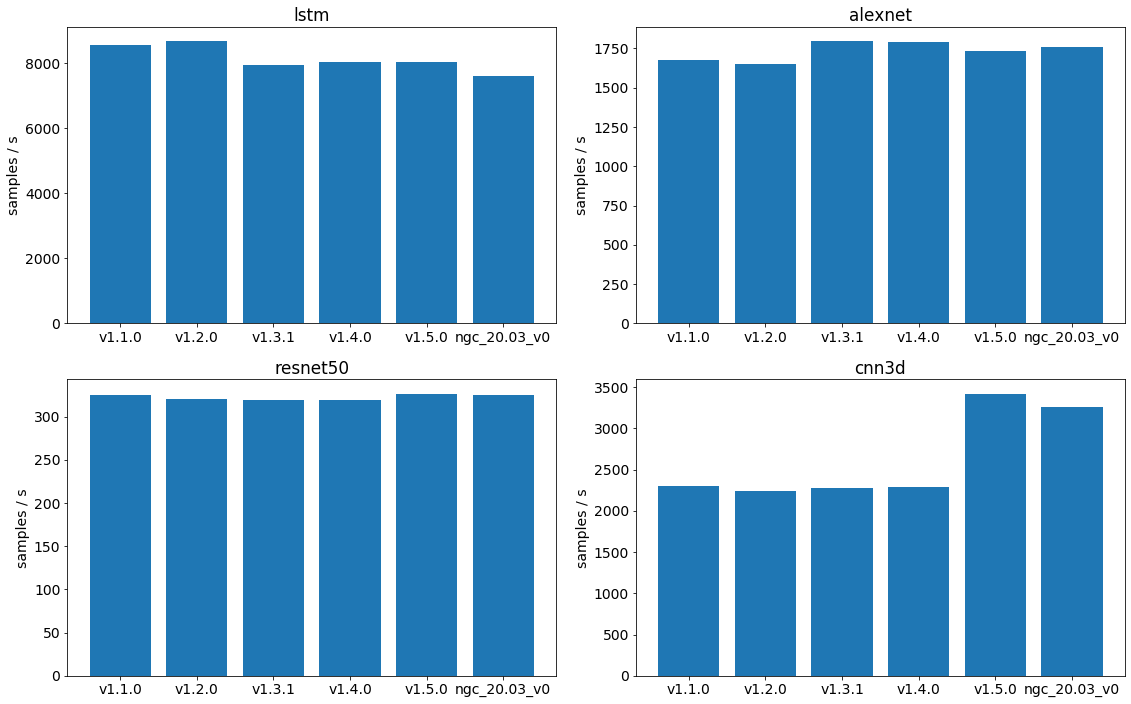

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model] #.sort_values('version')
    ax.bar(model_results.version, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()

## Inference throughput comparisons

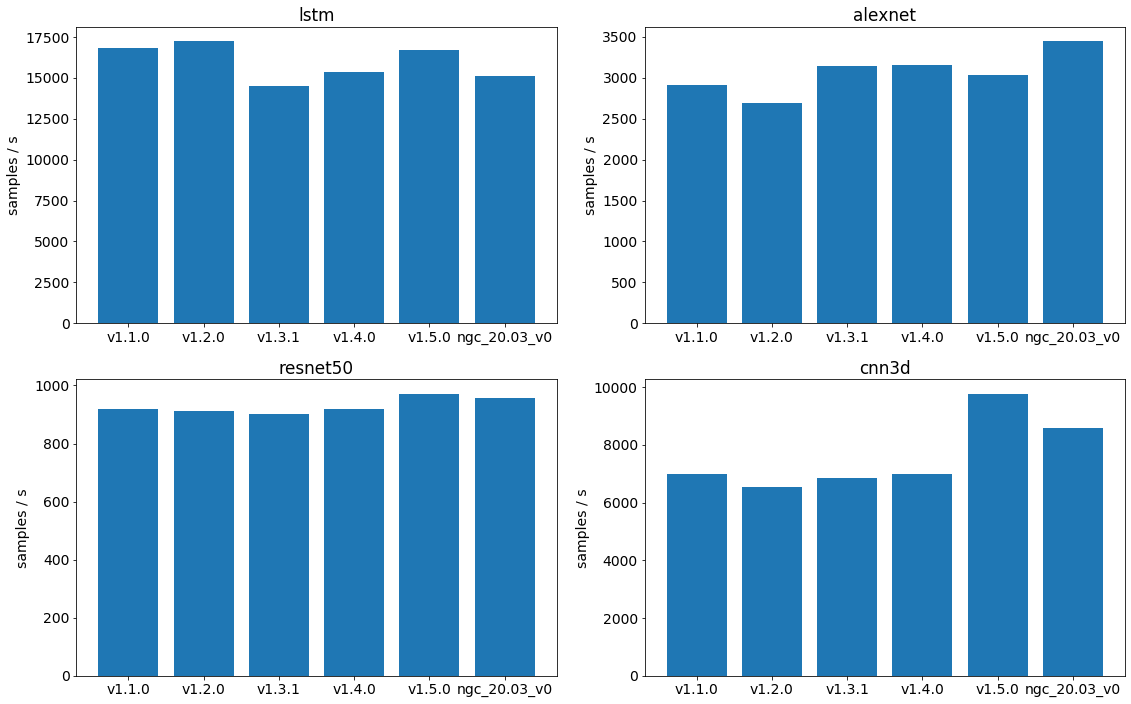

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results[results.model == model] #.sort_values('version')
    ax.bar(model_results.version, model_results.inference_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()